# Overview for Misinforation stock market analysis!
This code will represent some statistical findings for the near final results of our dataset and will hopefully prove whether misinformation does in fact affect market volatility and by how much. 

In [9]:
import pandas as pd

misInfo = pd.read_csv('Transformed_label_Misinfo.csv')
misInfo.head()



,Stock,Date,Headline,Snippet,Label,Open,High,Low,Close,Volume,Return,Volatility,Ticker,EWMA_Volatility
0,Caesars Entertainment,4/13/2020,NaN,Shareholders of Caesars Entertainment would pr...,1,18.25,18.4,15.65,17.09,5851000,-0.0563,0.1946,CZR,0.1786
1,Caesars Entertainment,4/13/2020,Caesars Entertainment Inc. stock outperforms c...,Shares of Caesars Entertainment Inc. advanced ...,0,18.25,18.4,15.65,17.09,5851000,-0.0563,0.1946,CZR,0.1786
2,Caesars Entertainment,4/13/2020,NaN,Caesars stock soared after the stock buyback n...,0,18.25,18.4,15.65,17.09,5851000,-0.0563,0.1946,CZR,0.1786
3,Caesars Entertainment,4/13/2020,Yahoo Finance,Caesars Entertainment (CZR ... reaching an ann...,0,18.25,18.4,15.65,17.09,5851000,-0.0563,0.1946,CZR,0.1786
4,Caesars Entertainment,4/13/2020,Benzinga.com,"In the last three months, 8 analysts have publ...",1,18.25,18.4,15.65,17.09,5851000,-0.0563,0.1946,CZR,0.1786


In [219]:
# Assuming 'subData' is your dataframe with columns: ['Corporation', 'Date', 'Label', 'Volatility']

# Step 1: Convert 'Date' to datetime if it isn't already
misInfo['Date'] = pd.to_datetime(misInfo['Date'])

label_counts = misInfo.groupby(['Ticker', 'Date', 'Label']).size().unstack(fill_value=0)

label_counts = label_counts.reset_index()

label_counts.columns = ['Ticker', 'Date', 'Real Articles', 'Fake Articles']
label_counts['Total Articles'] = label_counts['Real Articles'] + label_counts['Fake Articles']

label_counts['Misinformation Percentage'] = (label_counts['Fake Articles'] / label_counts['Total Articles']) * 100

label_counts['Misinformation Percentage'] = label_counts['Misinformation Percentage'].round(2).astype(float)

label_counts.head()

,Ticker,Date,Real Articles,Fake Articles,Total Articles,Misinformation Percentage
0,A,2020-04-13,5,5,10,50.00
1,AAPL,2020-04-06,5,1,6,16.67
2,ABBV,2020-04-08,4,5,9,55.56
3,ABNB,2021-01-26,1,4,5,80.00
4,ABT,2020-04-06,5,3,8,37.50


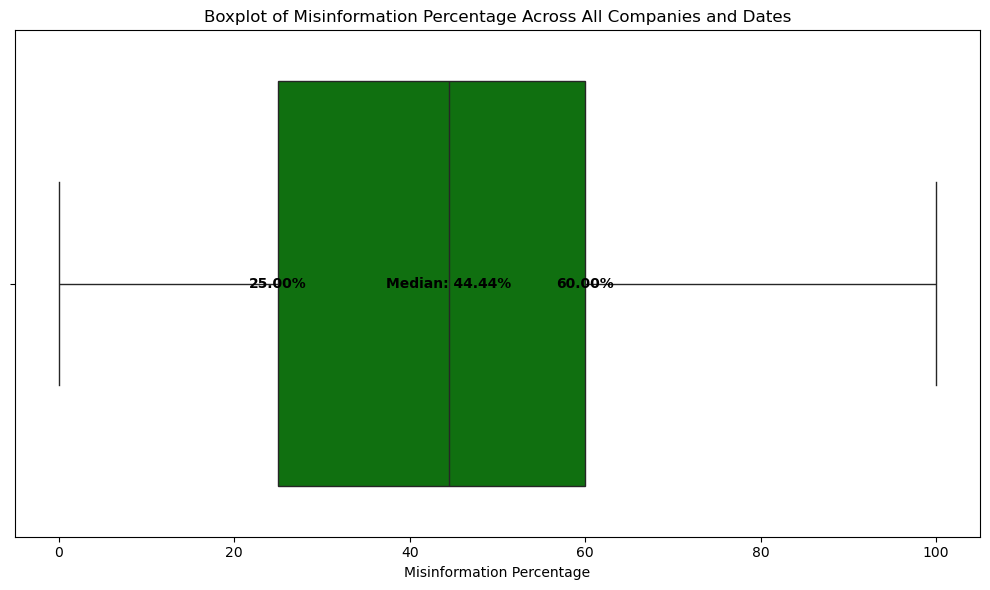

In [247]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=label_counts, x='Misinformation Percentage', color='Green', orient='h')
Q1 = label_counts['Misinformation Percentage'].quantile(0.25)
median = label_counts['Misinformation Percentage'].median()
Q3 = label_counts['Misinformation Percentage'].quantile(0.75)
ax.text(Q1, 0, f'{Q1:.2f}%', color='Black', ha='center', va='center', fontweight='bold')
ax.text(median, 0, f'Median: {median:.2f}%', color='Black', ha='center', va='center', fontweight='bold')
ax.text(Q3, 0, f'{Q3:.2f}%', color='Black', ha='center', va='center', fontweight='bold')
plt.title('Boxplot of Misinformation Percentage Across All Companies and Dates')
plt.xlabel('Misinformation Percentage')
plt.tight_layout()
plt.show()

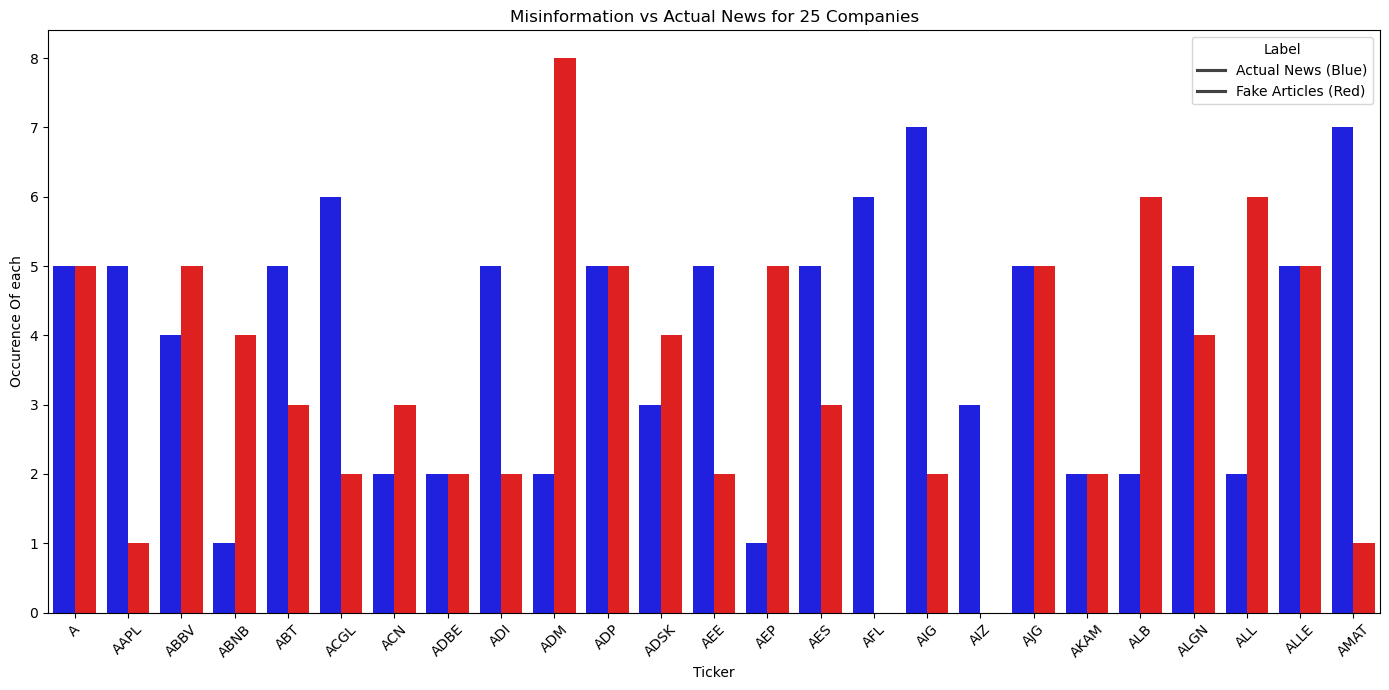

In [251]:
# Step 1: Select the first 5 companies (or choose 5 specific ones)
top_companies = label_counts['Ticker'].unique()[:25]

# Step 2: Filter the data for these companies
filtered_data = label_counts[label_counts['Ticker'].isin(top_companies)]

# Step 3: Plotting - Bar plot for Label 0 and Label 1 counts per company
plt.figure(figsize=(14, 7))

# Step 4: Create a bar plot with different colors for Label 0 and Label 1
sns.barplot(data=filtered_data.melt(id_vars=["Ticker", "Date"], value_vars=["Real Articles", "Fake Articles"]),
            x="Ticker", y="value", hue="variable", palette=["blue", "Red"])

# Add title and labels
plt.title("Misinformation vs Actual News for 25 Companies")
plt.xlabel("Ticker")
plt.ylabel("Occurence Of each")
plt.xticks(rotation=45)
plt.legend(title="Label", labels=["Actual News (Blue)", "Fake Articles (Red)"])

# Show plot
plt.tight_layout()
plt.show()

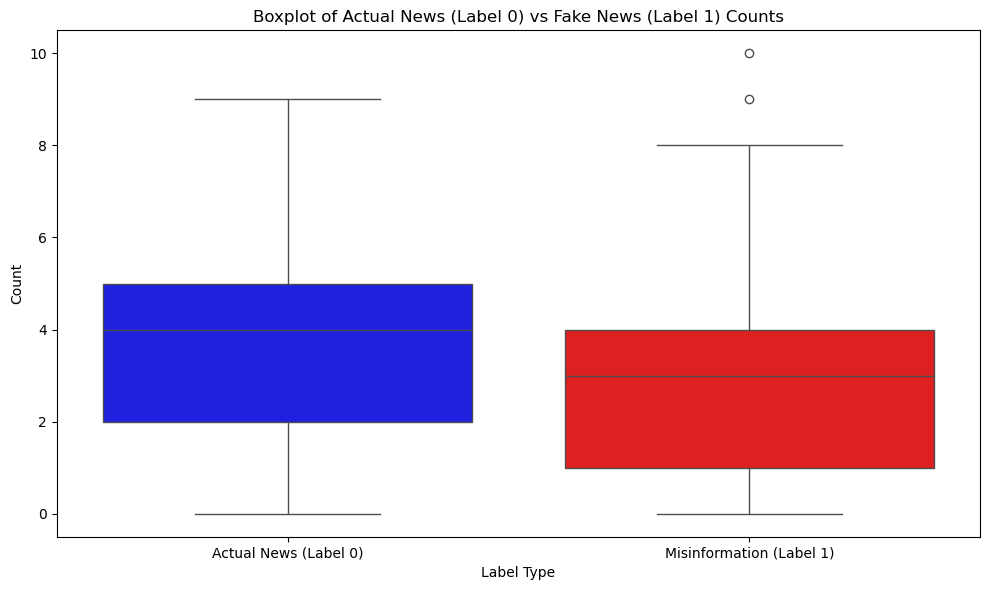

In [197]:

melted_data = label_counts.melt(id_vars=['Ticker', 'Date'], value_vars=['Real Articles', 'Fake Articles'], 
                                var_name='Label_Type', value_name='Count')
plt.figure(figsize=(10, 6))


sns.boxplot(data=melted_data, x='Label_Type', y='Count', palette=["Blue", "Red"], hue = 'Label_Type')
plt.title("Boxplot of Actual News (Label 0) vs Fake News (Label 1) Counts")
plt.xlabel("Label Type")
plt.ylabel("Count")
plt.xticks([0, 1], ['Actual News (Label 0)', 'Misinformation (Label 1)'])
plt.tight_layout()
plt.show()

In [31]:


subData = df[['Label', 'Open','High','Low','Close','Volume','Return','Volatility', 'EWMA_Volatility']]
subData.head(1)
subData.corr()

,Label,Open,High,Low,Close,Volume,Return,Volatility,EWMA_Volatility
Label,1.000000,0.003711,0.003500,0.003399,0.003484,0.013319,0.017305,-0.027129,-0.025093
Open,0.003711,1.000000,0.999485,0.999785,0.999056,-0.124969,0.031465,-0.159324,-0.138437
High,0.003500,0.999485,1.000000,0.999629,0.999821,-0.124465,0.046044,-0.157119,-0.135505
Low,0.003399,0.999785,0.999629,1.000000,0.999540,-0.124595,0.040808,-0.160537,-0.138876
Close,0.003484,0.999056,0.999821,0.999540,1.000000,-0.124325,0.054451,-0.159712,-0.137132
Volume,0.013319,-0.124969,-0.124465,-0.124595,-0.124325,1.000000,0.098548,0.103111,0.123646
Return,0.017305,0.031465,0.046044,0.040808,0.054451,0.098548,1.000000,0.021806,0.038602
Volatility,-0.027129,-0.159324,-0.157119,-0.160537,-0.159712,0.103111,0.021806,1.000000,0.938298
EWMA_Volatility,-0.025093,-0.138437,-0.135505,-0.138876,-0.137132,0.123646,0.038602,0.938298,1.000000


In [23]:
from scipy import stats 
correlation, pVal = stats.pearsonr(subData.Label, subData.Volatility)
corr2, pVal2 = stats.pearsonr(subData.Label, subData.EWMA_Volatility)
print(round(correlation, 4), "This is the correlation for Label and Volatility.")
print(round(pVal, 4) ,"This is the P-value for label and Volatility.")

-0.0271 This is the correlation for Label and Volatility
0.1993 This is the P-value for label and Volatility


not this one


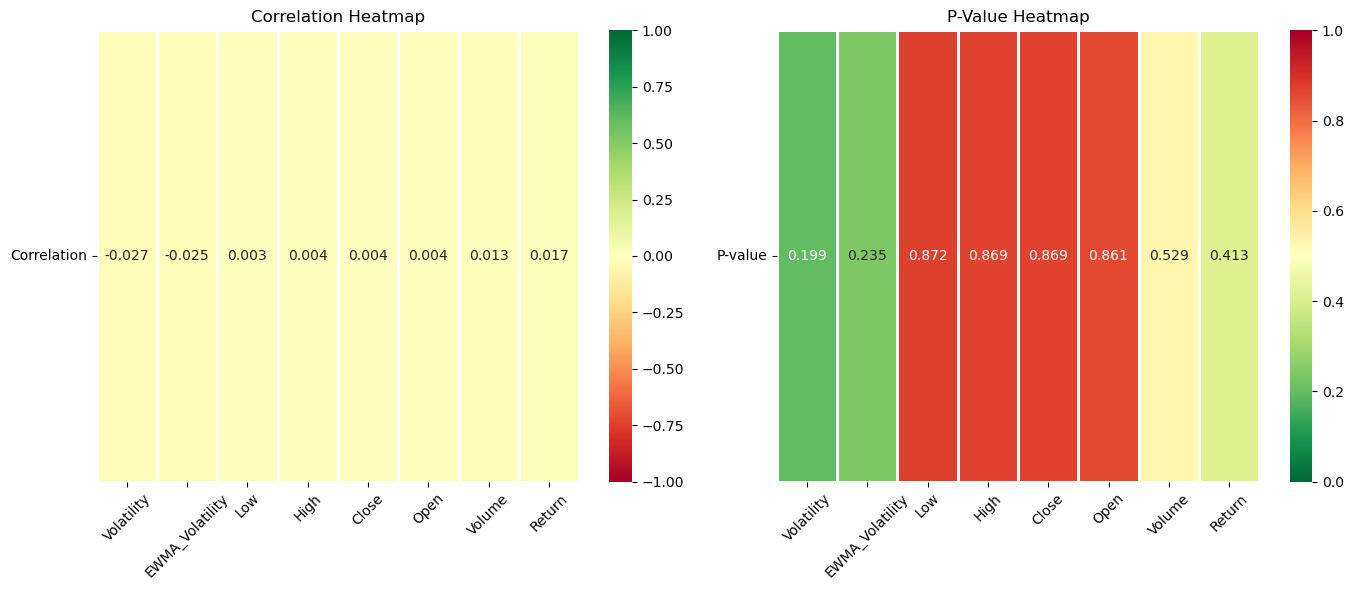

                 Correlation  P-value
Volatility           -0.0271    0.199
EWMA_Volatility      -0.0251    0.235
Low                   0.0034    0.872
High                  0.0035    0.869
Close                 0.0035    0.869
Open                  0.0037    0.861
Volume                0.0133    0.529
Return                0.0173    0.413


In [101]:
corr_df = pd.DataFrame(columns=["Correlation", "P-value"])

for x in subData:
    if x == "Label":
        print("not this one")
    else:
        corr, pVal = stats.pearsonr(subData.Label, subData[x])
        corr_df.loc[x] = [round(corr, 4), round(pVal, 3)]



#Plotting both Correlation and P-value where Highest P-value 1 (not statistically significant is green, and 0 is red. and correlation 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#The correlation is 


sns.heatmap(corr_df_sorted[['Correlation']].T, annot=True, cmap="RdYlGn", center=0, vmin=-1, vmax=1, fmt=".3f", linewidths=1, ax=axes[0])
axes[0].set_title("Correlation Heatmap")
axes[0].tick_params(axis='y', rotation=0)  
axes[0].tick_params(axis='x', rotation=45)  
sns.heatmap(corr_df_sorted[['P-value']].T, annot=True, cmap="RdYlGn_r", center=0.5, vmin=0, vmax=1, fmt=".3f", linewidths=1, ax=axes[1])
axes[1].set_title("P-Value Heatmap")
axes[1].tick_params(axis='y', rotation=0)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

print(corr_df_sorted)

In [37]:
avg = subData.loc[subData['Label'] == 1, 'Volatility'].mean()
print(avg)
avg2 = subData.loc[subData['Label'] == 0, 'Volatility'].mean() 
print(avg2)

0.07040030706243604
0.07158345209817894


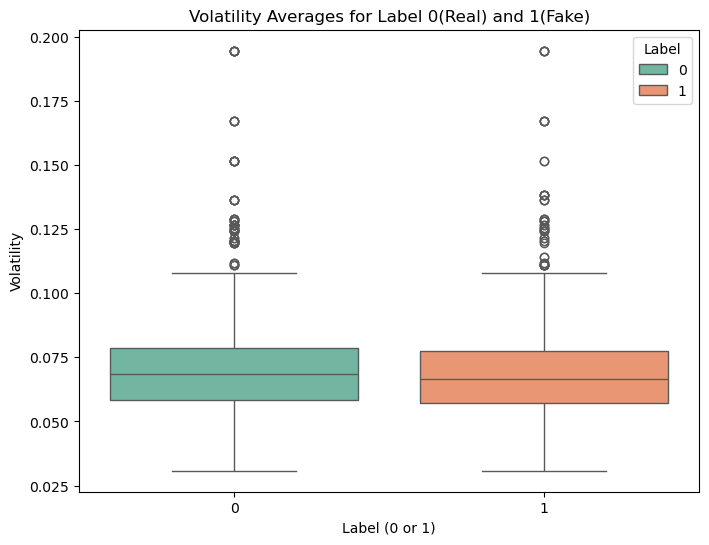

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='Volatility', data=subData, palette='Set2', hue = 'Label')
plt.title("Volatility Averages for Label 0(Real) and 1(Fake)")
plt.xlabel("Label (0 or 1)")
plt.ylabel("Volatility")
plt.show()

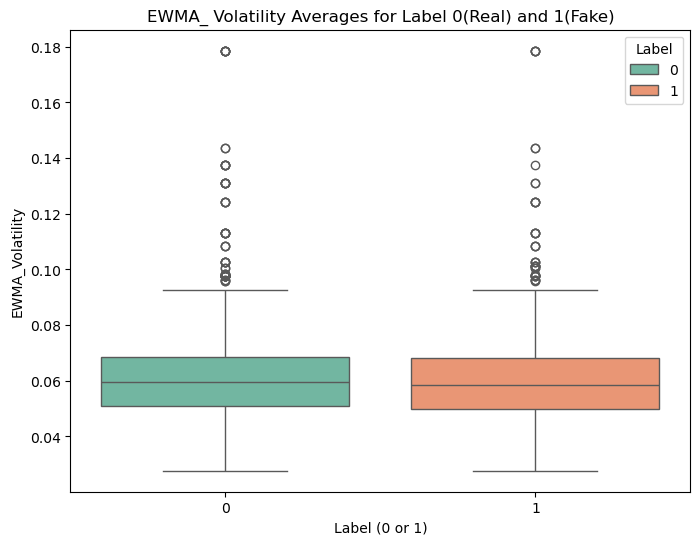

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='EWMA_Volatility', data=subData, palette='Set2', hue = 'Label')
plt.title("EWMA_ Volatility Averages for Label 0(Real) and 1(Fake)")
plt.xlabel("Label (0 or 1)")
plt.ylabel("EWMA_Volatility")
plt.show()

Variance of Volatility for Label 0: 0.00047126913165519024
Variance of Volatility for Label 1: 0.00046332175195479465


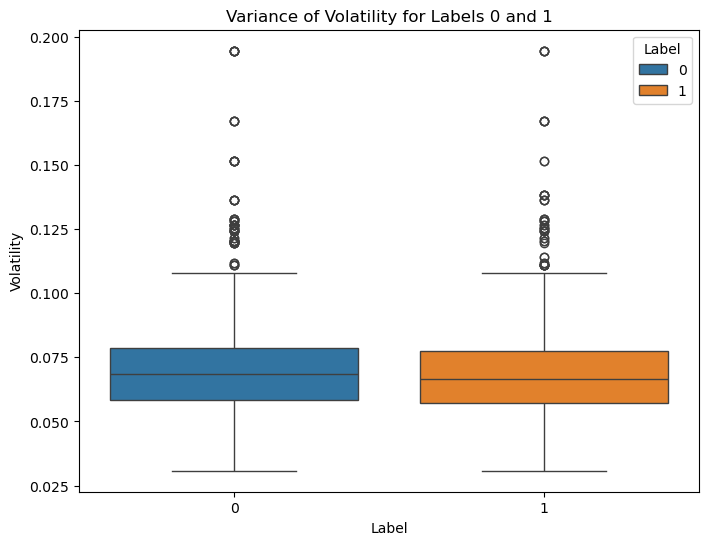

In [111]:
# Plot the variance of volatility for both labels using a boxplot
variance_0 = subData[subData['Label'] == 0]['Volatility'].var()
variance_1 = subData[subData['Label'] == 1]['Volatility'].var()

# Print the variances for both labels
print("Variance of Volatility for Label 0:", variance_0)
print("Variance of Volatility for Label 1:", variance_1)
plt.figure(figsize=(8, 6))

sns.boxplot(x="Label", y="Volatility", data=subData, hue ="Label")

plt.title("Variance of Volatility for Labels 0 and 1")
plt.xlabel("Label")
plt.ylabel("Volatility")
plt.show()

Frequency of each label:
Label
0    1263
1     977
Name: count, dtype: int64


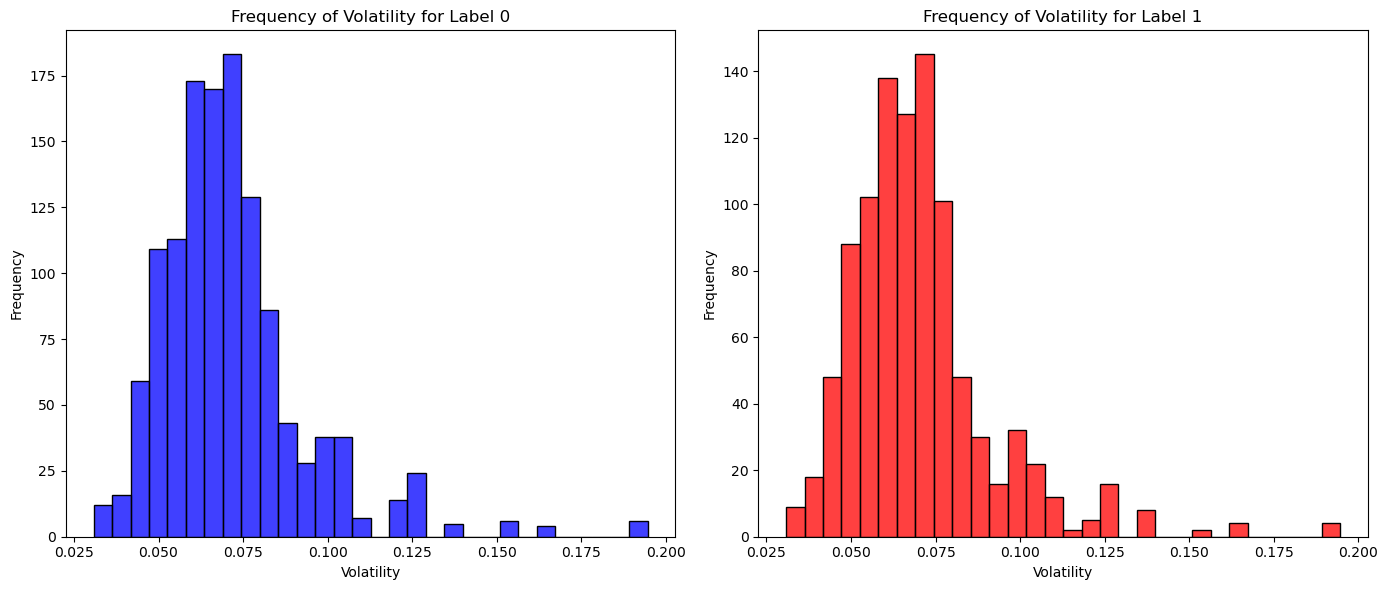

In [139]:
# Get the frequency of each label (0 and 1)
label_counts = subData['Label'].value_counts()

# Print the frequency of each label
print("Frequency of each label:")
print(label_counts)
# Plotting separate subplots for Label 0 and Label 1
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for Label 0 in the first subplot
sns.histplot(subData[subData['Label'] == 0]['Volatility'], bins=30, kde=False, color='blue', label='Label 0', stat='count', ax=axes[0])
axes[0].set_title('Frequency of Volatility for Label 0')
axes[0].set_xlabel('Volatility')
axes[0].set_ylabel('Frequency')

# Plot histogram for Label 1 in the second subplot
sns.histplot(subData[subData['Label'] == 1]['Volatility'], bins=30, kde=False, color='red', label='Label 1', stat='count', ax=axes[1])
axes[1].set_title('Frequency of Volatility for Label 1')
axes[1].set_xlabel('Volatility')
axes[1].set_ylabel('Frequency')

# Adjust layout to make sure there's no overlap
plt.tight_layout()

# Show the plot
plt.show()

Label 0 - Standard Deviation: 0.02170873399475866, IQR: 0.02040000000000001
Label 1 - Standard Deviation: 0.021524910033605127, IQR: 0.0204
